# Imports and data load 🛫

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/internet_service_churn.csv"
df = pd.read_csv(path)

# Initial data analysis 👩‍🏫

In [ ]:
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


**• is_tv_subscriber:** the user subscribed to the TV package

**• is_movie_package_subscriber:** the user subscribed to the movie package

**• subscription_age:** the duration of the contract measured in years

**• bill_avg:** the average bill amount in PLN from the contract period

**• reamining_contract:** the remaining time until the contract ends, measured
in years

**• service_failure_count:** the number of service failure reports

**• download_avg:** the average monthly download usage in GB from the contract period

**• upload_avg:** the average monthly upload usage in GB from the contract period

**• download_over_limit:** the number of times the purchased GB package was exceeded

**• churn:** an indication of whether the user has churned

In [ ]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


**• count:** The number of non-null (non-NaN) values in each column. It indicates how many data entries exist for each variable.

**• mean:** The arithmetic mean of the values in each column. It is the sum of all values divided by the number of those values.

**• std:** The standard deviation, which measures how much the values in the column are spread out around the mean.

**• min:** The minimum value in each column.

**• 25%:** The first quartile, which indicates the value below which 25% of the data fall.

**• 50%:** The median (second quartile), which indicates the value below which 50% of the data fall. It is the middle value of the dataset.

**• 75%:** The third quartile, which indicates the value below which 75% of the data fall.

**• max:** The maximum value in each column.

In [ ]:
# Check if any value is empty
df.info()
print()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB



id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


**3 columns have empty values:**

**• reamining_contract:** 21572 records.
We can assume that the lack of value means the contract has ended. Any of the empty records can be replaced with the value 0.

**• download_avg:** 381 records

**• upload_avg:** 381 records

Due to the small percentage of data, these users can be removed from the data set.



In [ ]:
# Check if any value is negative
negative_values = (df < 0).any()
print(negative_values)

# Select only numeric columns for comparison
numeric_df = df.select_dtypes(include=[np.number])

# Find rows with negative values
negative_rows = numeric_df[numeric_df < 0].dropna(how='all')

# Display only the columns with negative values
columns_with_negatives = negative_rows.columns[negative_rows.notna().any()]
negative_values_df = negative_rows[columns_with_negatives]
print(f"\n{negative_values_df}")

id                             False
is_tv_subscriber               False
is_movie_package_subscriber    False
subscription_age                True
bill_avg                       False
reamining_contract             False
service_failure_count          False
download_avg                   False
upload_avg                     False
download_over_limit            False
churn                          False
dtype: bool

       subscription_age
69320             -0.02


There is 1 record in the subscription_age column with a negative value. Such an error should be replaced with a value of 0.

In [ ]:
# Change NaN in 'reamining_contract' with 0
df['reamining_contract'].replace(np.nan, 0, inplace=True)

# Change negative values in column 'subscription_age' with 0
df['subscription_age'] = df['subscription_age'].apply(lambda x: 0 if x < 0 else x)

# Remove empty download/upload rows
df['download_avg'].replace('', np.nan, inplace=True)
df['upload_avg'].replace('', np.nan, inplace=True)
df.dropna(subset=['download_avg'], inplace=True)
df.dropna(subset=['upload_avg'], inplace=True)

# Remove the 'id' column
df.drop(columns=['id'], inplace=True)

In [ ]:
# Check if any value is empty
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [ ]:
# Check if any value is negative
negative_values_after_correction = (df < 0).any()

print(negative_values_after_correction)

is_tv_subscriber               False
is_movie_package_subscriber    False
subscription_age               False
bill_avg                       False
reamining_contract             False
service_failure_count          False
download_avg                   False
upload_avg                     False
download_over_limit            False
churn                          False
dtype: bool


All data was formatted correctly.
There are no empty records or negative values

# Charts 📊

churn
1    40050
0    31843
Name: count, dtype: int64

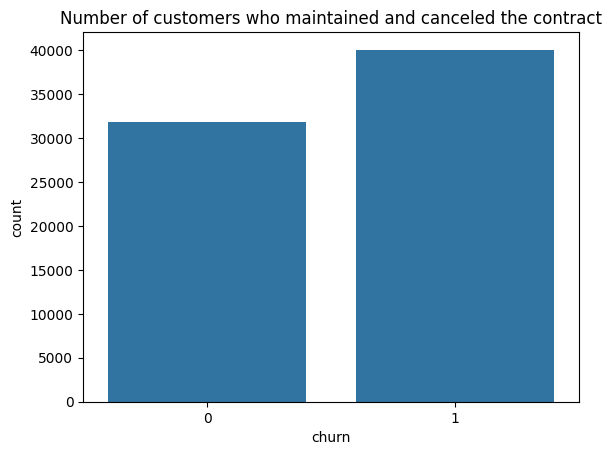

In [ ]:
plt.title("Number of customers who maintained and canceled the contract")
sn.countplot(x = 'churn' ,  data = df)
df['churn'].value_counts()


is_movie_package_subscriber
0    47876
1    24017
Name: count, dtype: int64

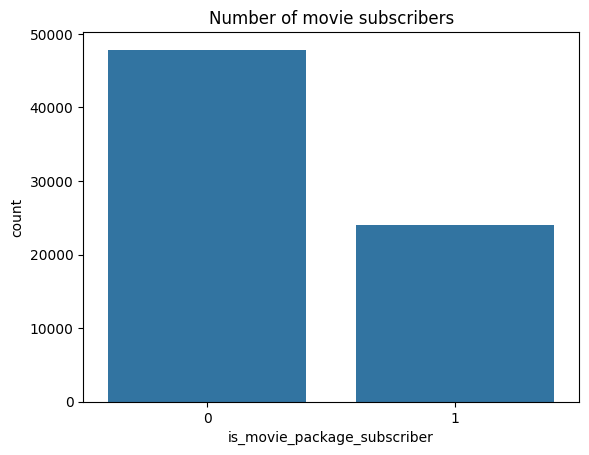

In [ ]:
plt.title("Number of movie subscribers")
sn.countplot(x = 'is_movie_package_subscriber' ,  data = df)
df['is_movie_package_subscriber'].value_counts()


**The movie package enjoys an interest rate of approximately 25%.**

is_tv_subscriber
1    58609
0    13284
Name: count, dtype: int64

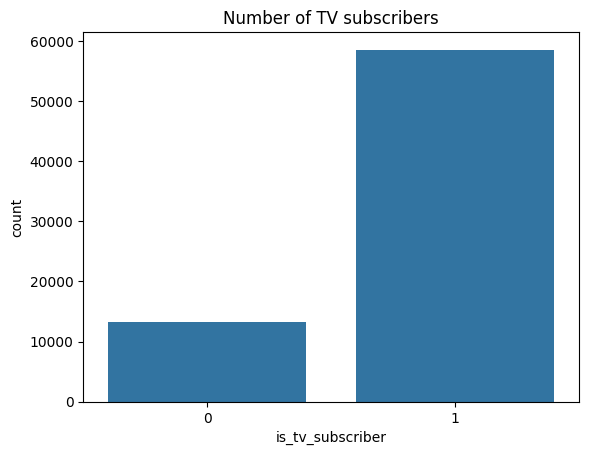

In [ ]:
plt.title("Number of TV subscribers")
sn.countplot(x = 'is_tv_subscriber' ,  data = df)
df['is_tv_subscriber'].value_counts()


**The vast majority of users choose a TV package**

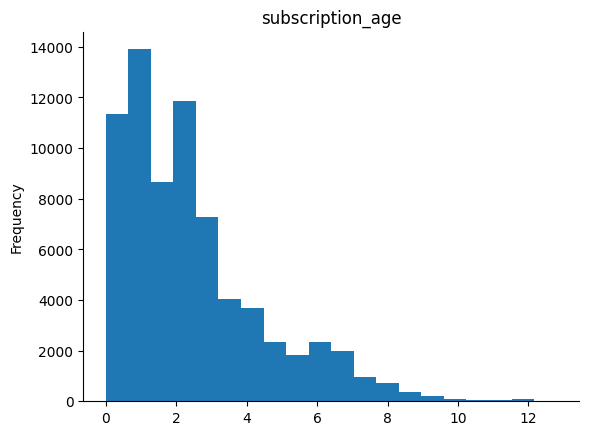

In [ ]:
df['subscription_age'].plot(kind='hist', bins=20, title='subscription_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

**After the first period of validity of the contract, users do not decide to extend it**

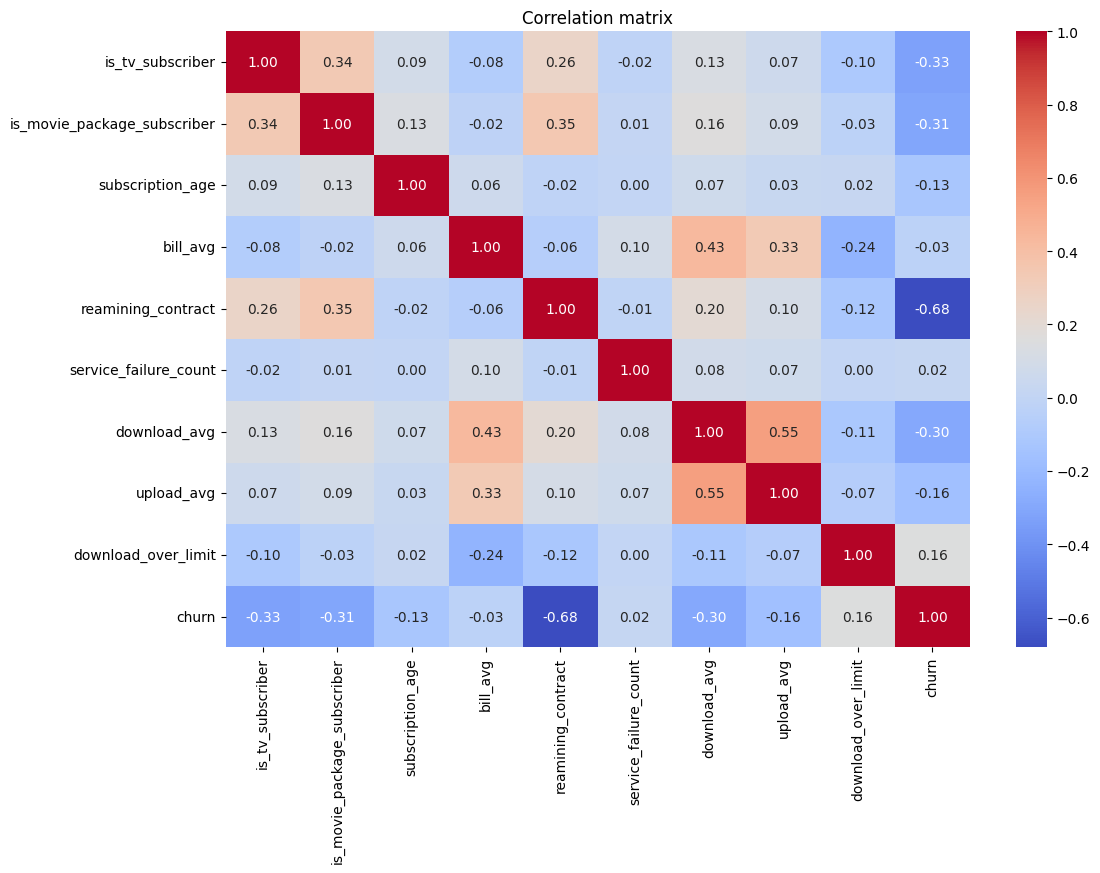

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sn.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [ ]:
df_copy = df.copy()
df_copy['subscription_type'] = 'No subscription'
df_copy.loc[(df_copy['is_tv_subscriber'] == 1) & (df_copy['is_movie_package_subscriber'] == 0), 'subscription_type'] = 'TV'
df_copy.loc[(df_copy['is_tv_subscriber'] == 0) & (df_copy['is_movie_package_subscriber'] == 1), 'subscription_type'] = 'Streaming'
df_copy.loc[(df_copy['is_tv_subscriber'] == 1) & (df_copy['is_movie_package_subscriber'] == 1), 'subscription_type'] = 'TV + Streaming'

In [ ]:
subscription_counts = df_copy['subscription_type'].value_counts()
print(subscription_counts)

subscription_type
TV                 34594
TV + Streaming     24015
No subscription    13282
Streaming              2
Name: count, dtype: int64


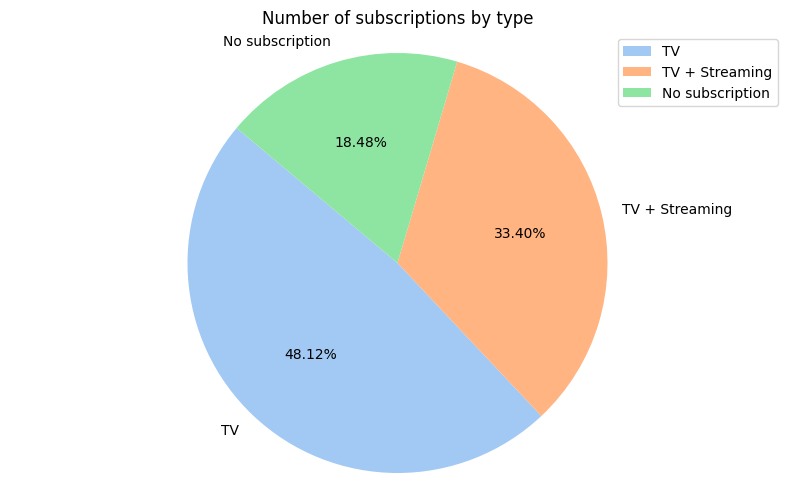

In [ ]:
plt.figure(figsize=(10, 6))

subscription_counts = df_copy['subscription_type'].value_counts()
if 'Streaming' in subscription_counts.index:
    subscription_counts = subscription_counts.drop('Streaming')

colors = sn.color_palette('pastel')[0:len(subscription_counts)]
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title('Number of subscriptions by type')
plt.axis('equal')
plt.legend(subscription_counts.index, loc="best")
plt.show()

**1.Dominance of TV Subscriptions:**

The largest segment of users are TV subscribers, accounting for 48.12% of all users. This suggests that TV services are the most popular among the company's customers.

**2. Significant Number of TV + Streaming Users:**

Users who utilize both TV and Streaming services make up 33.40% of all subscriptions. This is a significant segment, indicating that many customers prefer having both services.

**3. Lack of Subscription:**

Users without any subscription account for 18.48%. This is an important group as it may suggest potential customers who are not yet convinced by the offered services or are considering cancellation.

**4. Low Number of Streaming-Only Subscribers:**

Only 2 users (which is a very small percentage) use Streaming services exclusively. This may suggest that Streaming services alone are not as attractive to customers or that the company promotes TV and TV + Streaming packages more heavily.

**Conclusions:**

**Potential to Increase Streaming Subscriptions:** Since very few users utilize Streaming services exclusively, there is potential to better promote and develop this offering to attract more users.

**Maintaining and Developing TV Offerings:** The largest segment of customers are TV subscribers, suggesting that the company should continue to develop and maintain high-quality TV services.

In [ ]:
package_churn = df_copy.groupby('subscription_type')['churn'].mean() * 100
print("Churn rates by subscription type (%):")
print(package_churn)

Churn rates by subscription type (%):
subscription_type
No subscription     90.076796
Streaming          100.000000
TV                  57.498410
TV + Streaming      34.116177
Name: churn, dtype: float64


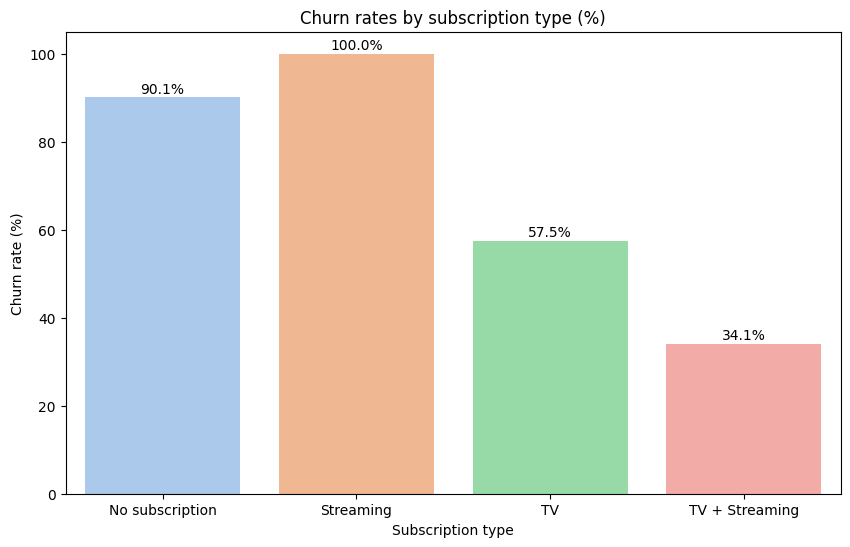

In [ ]:
plt.figure(figsize=(10, 6))
sn.barplot(x=package_churn.index, y=package_churn.values, hue=package_churn.index, palette='pastel', dodge=False)
plt.title('Churn rates by subscription type (%)')
plt.xlabel('Subscription type')
plt.ylabel('Churn rate (%)')
for i in range(len(package_churn)):
    plt.text(i, package_churn[i] + 1, f'{package_churn[i]:.1f}%', ha='center')
plt.legend().remove()
plt.show()

**1. High churn rate for users without a subscription:**

Users without any subscription have a very high churn rate of 90.1%. This group is very unstable and requires special attention.

**2. 100% churn rate for Streaming-only subscribers:**

Users who have only a Streaming subscription have a 100% churn rate. This means that every user who had this subscription has canceled the service. This is a clear signal that the Streaming offer may need improvement or a rethink of the marketing strategy.

 **3. High churn rate for TV subscribers:**

Users who subscribe only to TV have a churn rate of 57.5%. This is also a high rate, suggesting that a significant portion of customers may not be fully satisfied with the TV services.

**4. Lowest churn rate for TV + Streaming subscribers:**

The lowest churn rate (34.1%) is among users who use both TV and Streaming services. This suggests that the combination of these two services is the most attractive to customers and may lead to higher customer retention.

**Conclusions:**

**Focus on improving the Streaming offer:** The very high churn rate for Streaming subscriptions suggests that this offer requires significant changes to attract and retain customers.

**Improve the quality of TV services:** The high churn rate for TV subscriptions also indicates the need to rethink the strategy and improve the quality of services to reduce the number of cancellations.

**Promote TV + Streaming packages:** The lowest churn rate among TV + Streaming subscribers suggests that promoting these packages may be an effective strategy for increasing customer retention.

**Understand the reasons for churn:** The company should investigate the reasons for high churn rates in specific segments to better understand the needs and expectations of customers.

In [ ]:
# Calculate the mean churn rate for each bin of the feature
download_avg_bins = df.groupby(pd.cut(df['download_avg'], bins=10))['churn'].mean()
upload_avg_bins = df.groupby(pd.cut(df['upload_avg'], bins=10))['churn'].mean()
service_failure_bins = df.groupby('service_failure_count')['churn'].mean()
download_over_limit_bins = df.groupby('download_over_limit')['churn'].mean()

# Ensure that any churn rate less than 0 is set to 0
download_avg_bins = download_avg_bins.apply(lambda x: max(x, 0))
upload_avg_bins = upload_avg_bins.apply(lambda x: max(x, 0))
service_failure_bins = service_failure_bins.apply(lambda x: max(x, 0))
download_over_limit_bins = download_over_limit_bins.apply(lambda x: max(x, 0))

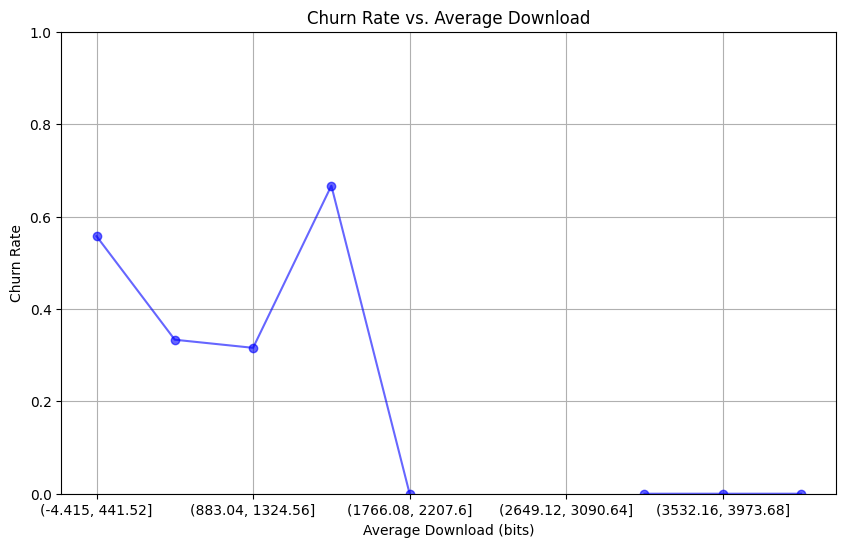

In [ ]:
# Data usage to churn (Average Download)
plt.figure(figsize=(10, 6))
download_avg_bins.plot(kind='line', marker='o', color='blue', alpha=0.6)
plt.title('Churn Rate vs. Average Download')
plt.xlabel('Average Download (bits)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

**Average Download analysis**

The greater the customer's ability to download, the less likely they are to give up the service. This suggests that customers value high download speeds and are more satisfied with the service when their download needs are met.

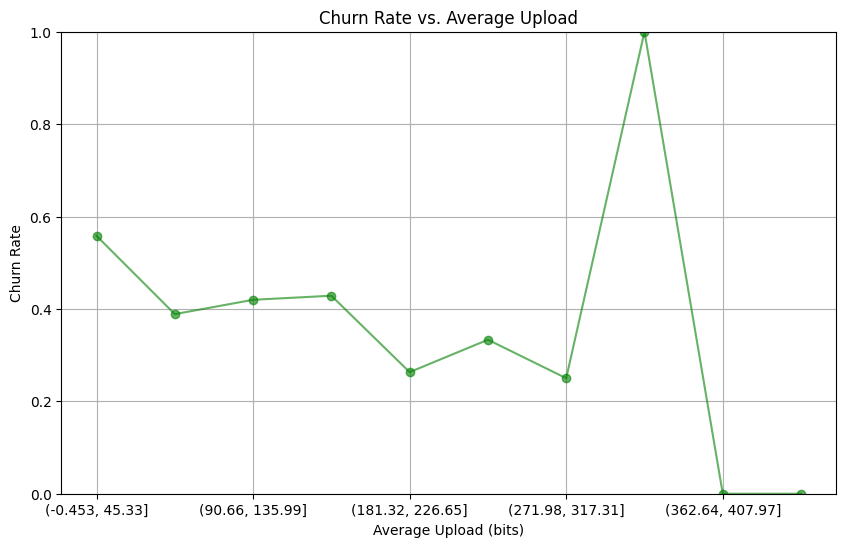

In [ ]:
# Data usage to churn (Average Upload)
plt.figure(figsize=(10, 6))
ax = upload_avg_bins.plot(kind='line', marker='o', color='green', alpha=0.6)
plt.title('Churn Rate vs. Average Upload')
plt.xlabel('Average Upload (bits)')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(True)

**Average Upload analysis**

The greater the customer's ability to upload, the less likely they are to give up the service. This indicates that high upload speeds are also important to customers, contributing to higher satisfaction and lower churn rates.

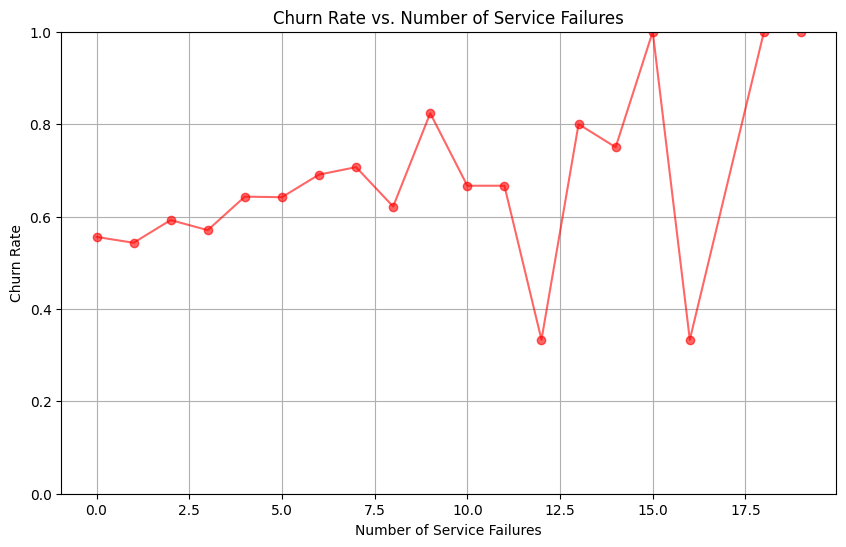

In [ ]:
# Number of service failures to churn
plt.figure(figsize=(10, 6))
service_failure_bins.plot(kind='line', marker='o', color='red', alpha=0.6)
plt.title('Churn Rate vs. Number of Service Failures')
plt.xlabel('Number of Service Failures')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

**Number of service failures analysis**

The more service failures that occur, the more frequently churn happens. This implies that improving service reliability and reducing the number of failures can significantly decrease the churn rate.



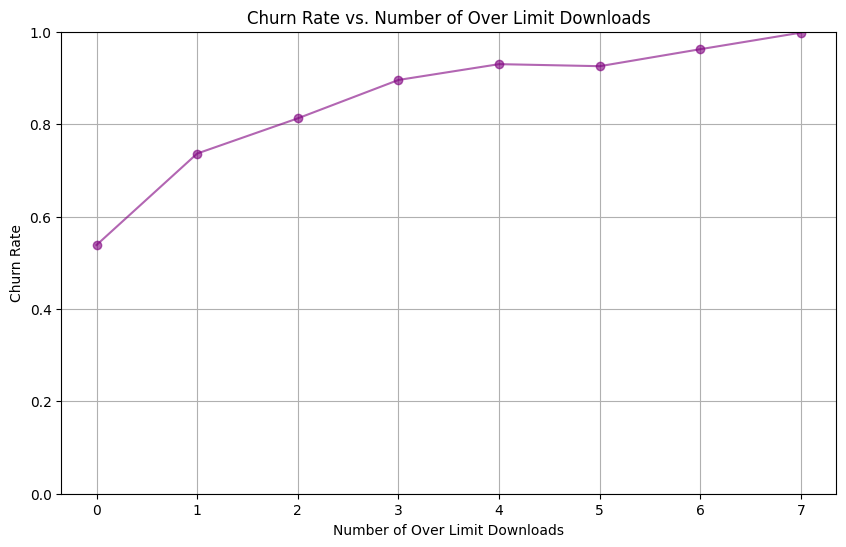

In [ ]:
# Number of over limit downloads to churn
plt.figure(figsize=(10, 6))
download_over_limit_bins.plot(kind='line', marker='o', color='purple', alpha=0.6)
plt.title('Churn Rate vs. Number of Over Limit Downloads')
plt.xlabel('Number of Over Limit Downloads')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

**Number of Over Limit Downloads analysis**

It turns out that the more often a customer exceeds download limits, the more likely they are to churn and give up the service. This suggests that customers are frustrated by hitting download limits, and addressing this issue could help retain more customers.



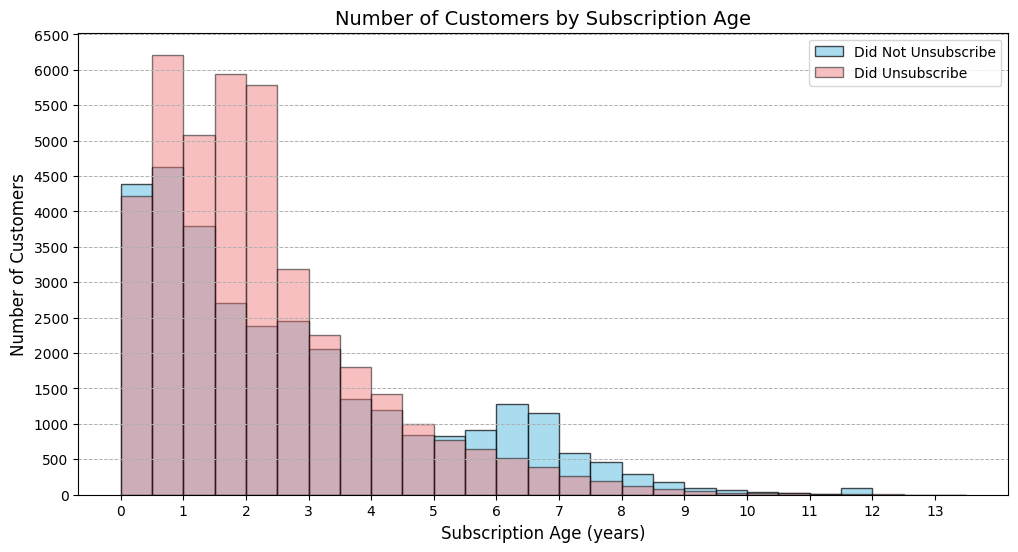

In [ ]:
churn_0 = df[df["churn"] == 0]["subscription_age"]
churn_1 = df[df["churn"] == 1]["subscription_age"]

plt.figure(figsize=(12, 6))

plt.hist(churn_0, edgecolor="black", bins=np.arange(0, 14, 0.5), color="skyblue", alpha=0.7, label="Did Not Unsubscribe")

plt.hist(churn_1, edgecolor="black", bins=np.arange(0, 14, 0.5), color="lightcoral", alpha=0.5, label="Did Unsubscribe")

plt.title("Number of Customers by Subscription Age", fontsize=14)
plt.xlabel("Subscription Age (years)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.xticks(np.arange(0, 14, step=1))
plt.yticks(np.arange(0, 7000, step=500))

plt.grid(axis="y", linestyle="--", linewidth=0.7)

plt.legend()

plt.show()

The graph shows the number of customers according to the length of the subscription. The pink bars indicate customers who have ended their subscription and the blue bars indicate those who are still subscribing to the packages.

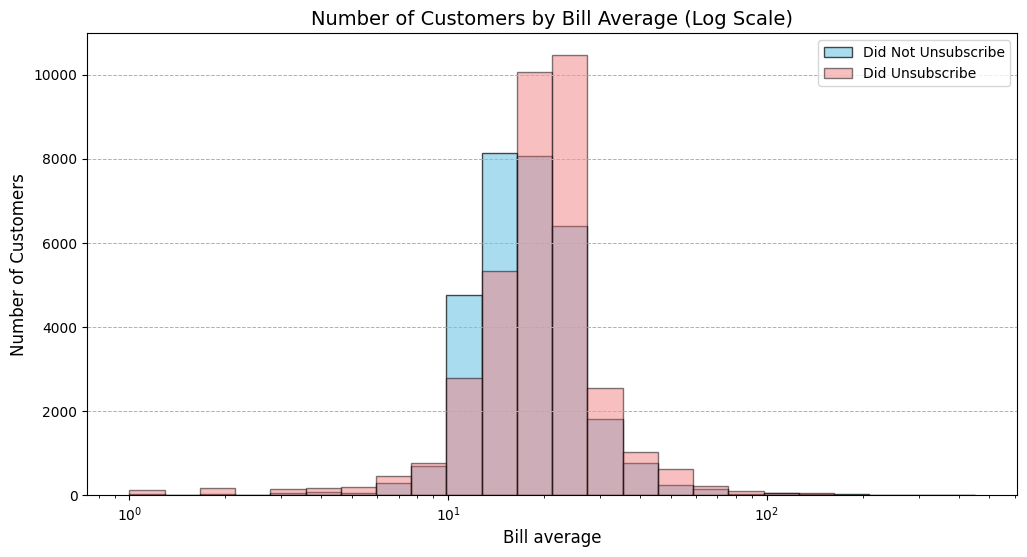

In [ ]:
churn_0 = df[df["churn"] == 0]["bill_avg"]
churn_1 = df[df["churn"] == 1]["bill_avg"]

plt.figure(figsize=(12, 6))

plt.hist(churn_0, edgecolor="black", bins=np.logspace(0, np.log10(450), 25), color="skyblue", alpha=0.7, label="Did Not Unsubscribe")

plt.hist(churn_1, edgecolor="black", bins=np.logspace(0, np.log10(450), 25), color="lightcoral", alpha=0.5, label="Did Unsubscribe")

plt.xscale('log')

plt.title("Number of Customers by Bill Average (Log Scale)", fontsize=14)
plt.xlabel("Bill average", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.grid(axis="y", linestyle="--", linewidth=0.7)

plt.legend()

plt.show()

The graph shows the number of customers according to bill average the subscription. The pink bars indicate customers who have ended their subscription and the blue bars indicate those who are still subscribing to the packages.

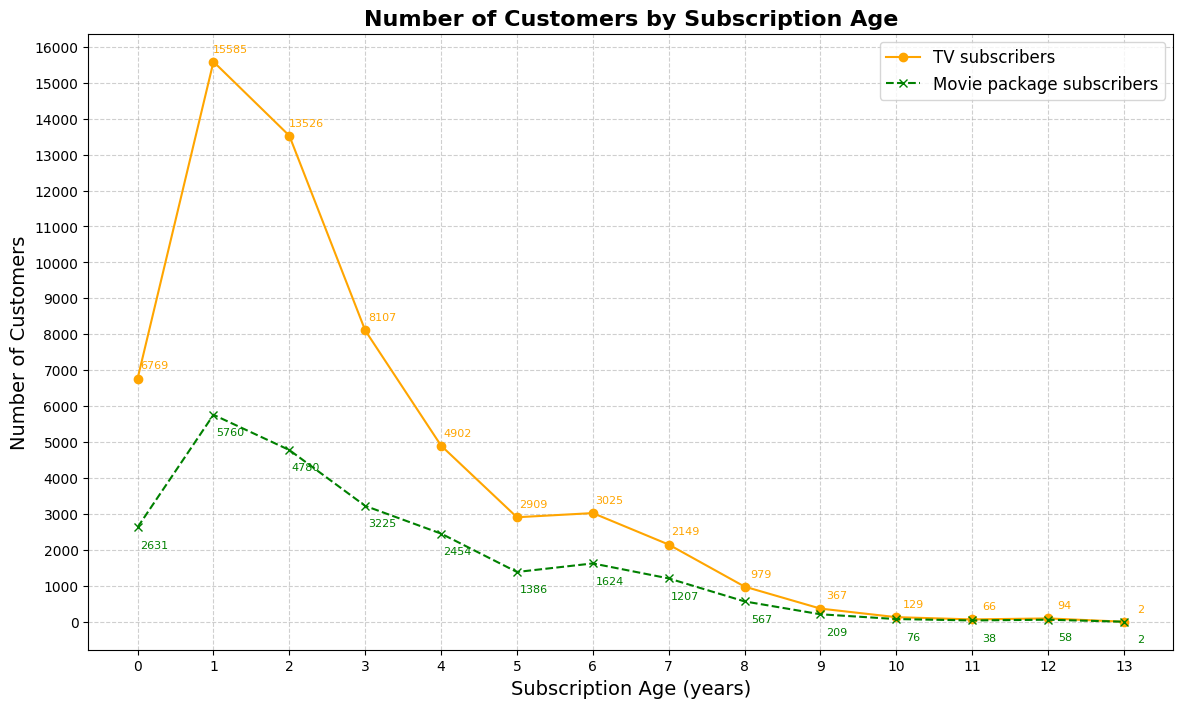

In [ ]:
df["subscription_age"] = df["subscription_age"].round()

tv_subscribers = df[df["is_tv_subscriber"] == 1]
movie_subscribers = df[df["is_movie_package_subscriber"] == 1]

tv_subscriber_counts = tv_subscribers["subscription_age"].value_counts().sort_index()
movie_subscriber_counts = movie_subscribers["subscription_age"].value_counts().sort_index()

plt.figure(figsize=(14, 8))

age_range = np.arange(0, 14)

plt.plot(age_range, tv_subscriber_counts, color='orange', linestyle='-', marker='o', label='TV subscribers')
plt.plot(age_range, movie_subscriber_counts, color='green', linestyle='--', marker='x', label='Movie package subscribers')

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.title("Number of Customers by Subscription Age", fontsize=16, fontweight='bold')
plt.xlabel("Subscription Age (years)", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.xticks(np.arange(0, 14, 1))
plt.yticks(np.arange(0, 17000, 1000))

for i in age_range:
    plt.annotate(tv_subscriber_counts[i], (i, tv_subscriber_counts[i]), textcoords="offset points", xytext=(12,7), ha='center', fontsize=8, color='orange')
    plt.annotate(movie_subscriber_counts[i], (i, movie_subscriber_counts[i]), textcoords="offset points", xytext=(12,-15), ha='center', fontsize=8, color='green')

plt.show()

The graph shows the number of customers according to the length of the subscription. The orange line indicate customers who have tv subscription and the green line indicate those who have movie package.

# Initial data processing ⚙

In [ ]:
from sklearn.preprocessing import OneHotEncoder, Normalizer

# Separate the features and the target variable
features = df.drop('churn', axis=1)
target = df['churn']

# Identify numeric and categorical columns
numeric_cols = features.select_dtypes(include=[np.number]).columns
categorical_cols = features.select_dtypes(exclude=[np.number]).columns

# Normalize numeric columns
normalizer = Normalizer(norm='l2')
features[numeric_cols] = normalizer.fit_transform(features[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_cols = encoder.fit_transform(features[categorical_cols])

# Convert the encoded columns back to a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Reset index before concatenating to avoid index mismatch
features.reset_index(drop=True, inplace=True)
encoded_categorical_df.reset_index(drop=True, inplace=True)

# Concatenate the normalized numeric columns with the encoded categorical columns
processed_features = pd.concat([features[numeric_cols], encoded_categorical_df], axis=1)

# Reset index of the target as well
target.reset_index(drop=True, inplace=True)

# Combine the processed features with the target variable
processed_data = pd.concat([processed_features, target], axis=1)

# Display the first few rows of the processed dataset
print(processed_data.head())

   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0          0.034383                          0.0          0.412600  0.859584   
1          0.000000                          0.0          1.000000  0.000000   
2          0.043581                          0.0          0.392232  0.697302   
3          0.000000                          0.0          0.315906  0.947717   
4          0.000000                          0.0          1.000000  0.000000   

   reamining_contract  service_failure_count  download_avg  upload_avg  \
0            0.004814               0.000000      0.288820    0.079082   
1            0.000000               0.000000      0.000000    0.000000   
2            0.000000               0.000000      0.597065    0.039223   
3            0.000000               0.045129      0.000000    0.000000   
4            0.000000               0.000000      0.000000    0.000000   

   download_over_limit  churn  
0                  0.0      0  
1         

# Models 💻

###**Evaluation and curve functions**

In [ ]:
# Function to evaluate model and print metrics
def evaluate_model(model, X_test, y_test, keras_model=False):
    y_pred = model.predict(X_test)
    if keras_model:
        y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')

    if X_val is not None and y_val is not None:
        y_pred_val = model.predict(X_val)
        if keras_model:
            y_pred_val = (y_pred_val > 0.5).astype(int)
        val_accuracy = accuracy_score(y_val, y_pred_val)
        val_precision = precision_score(y_val, y_pred_val)
        val_recall = recall_score(y_val, y_pred_val)
        val_f1 = f1_score(y_val, y_pred_val)

        print(f'Validation Accuracy: {val_accuracy:.4f}')
        print(f'Validation Precision: {val_precision:.4f}')
        print(f'Validation Recall: {val_recall:.4f}')
        print(f'Validation F1 Score: {val_f1:.4f}')

# Function to plot learning curves
def plot_learning_curve(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_learning_curve_sklearn(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='accuracy',
                                                           train_sizes=np.linspace(0.1, 1.0, 5),
                                                           n_jobs=-1)  # Adjust train_sizes for fewer points
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title(f"Learning Curve: {title}")
    plt.legend(loc="best")
    plt.show()


# Plot ROC curve and save the figure.
def plot_roc_curve(y_val, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = roc_auc_score(y_val, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc='best')
    plt.show()

###**Preparing data for model training**

In [ ]:
# Split the data into training, validation, and test sets

target_column = 'churn'
X = processed_data.drop(columns=[target_column])
y = processed_data[target_column]

# Split the data into 70% training, 15% validation, and 15% test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

###**Logistic Regression**

Test Accuracy: 0.8029
Test Precision: 0.8912
Test Recall: 0.7360
Test F1 Score: 0.8062
Validation Accuracy: 0.8005
Validation Precision: 0.8909
Validation Recall: 0.7315
Validation F1 Score: 0.8034


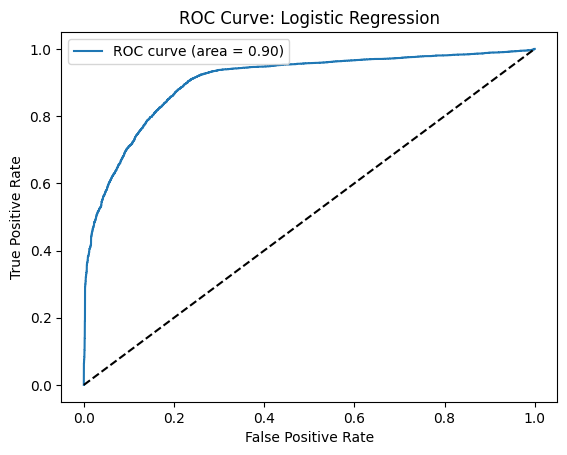

In [ ]:
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression_model.fit(X_train, y_train)

y_prob = logistic_regression_model.predict_proba(X_val)[:,1]

evaluate_model(logistic_regression_model, X_test, y_test)

# Plot learning curves for Logistic Regression model
#plot_learning_curve_sklearn(logistic_regression_model, X_train, y_train, "Logistic Regression Learning Curve")

# Plot ROC curve for Logistic Regression model
plot_roc_curve(y_val, y_prob, 'Logistic Regression')

###**SVC**

Test Accuracy: 0.8093
Test Precision: 0.8895
Test Recall: 0.7508
Test F1 Score: 0.8143
Validation Accuracy: 0.8055
Validation Precision: 0.8870
Validation Recall: 0.7460
Validation F1 Score: 0.8104


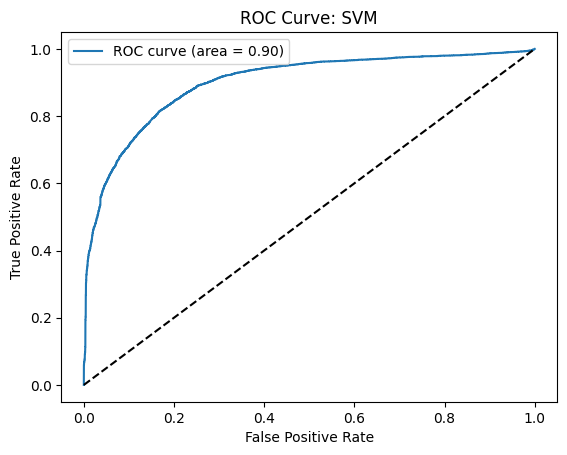

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_prob = svm_model.predict_proba(X_val)[:, 1]

evaluate_model(svm_model, X_test, y_test)

# Plot learning curves for SVM model
#plot_learning_curve_sklearn(svm_model, X_train, y_train, "SVC Learning Curve")

# Plot ROC curve for SVM model
plot_roc_curve(y_val, y_prob, 'SVM')

###**Random Forest**

Test Accuracy: 0.9379
Test Precision: 0.9544
Test Recall: 0.9331
Test F1 Score: 0.9436
Validation Accuracy: 0.9353
Validation Precision: 0.9517
Validation Recall: 0.9311
Validation F1 Score: 0.9413


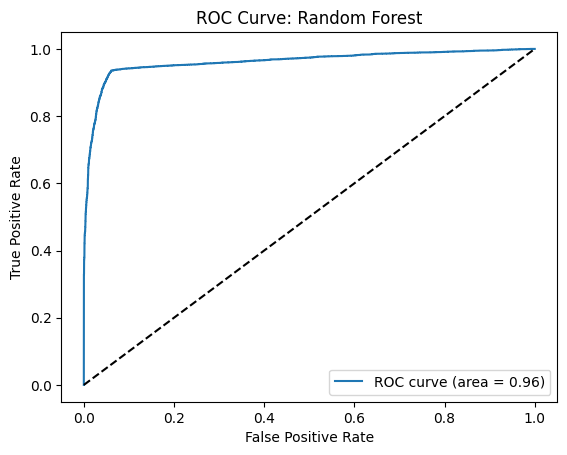

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
random_forest_model.fit(X_train, y_train)

y_prob = random_forest_model.predict_proba(X_val)[:, 1]

evaluate_model(random_forest_model, X_test, y_test)

# Plot learning curves for Random Forest model
#plot_learning_curve_sklearn(random_forest_model, X_train, y_train, "Random Forest Learning Curve")

# Plot ROC curve for Random Forest model
plot_roc_curve(y_val, y_prob, 'Random Forest')

###**Gradient Boosting**

In [ ]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_prob = gradient_boosting_model.predict_proba(X_val)[:, 1]

evaluate_model(gradient_boosting_model, X_test, y_test)

# Plot learning curves for Gradient Boosting model
#plot_learning_curve_sklearn(gradient_boosting_model, X_train, y_train, "Gradient Boosting Learning Curve")

# Plot ROC curve for Gradient Boosting model
plot_roc_curve(y_val, y_prob, 'Gradient Boosting')

###**K-Nearest**

Test Accuracy: 0.8501
Test Precision: 0.8703
Test Recall: 0.8590
Test F1 Score: 0.8646
Validation Accuracy: 0.8452
Validation Precision: 0.8667
Validation Recall: 0.8535
Validation F1 Score: 0.8600


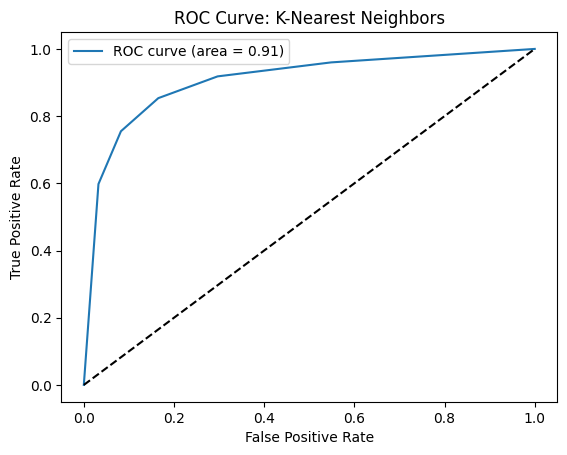

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn_model.fit(X_train, y_train)

y_prob = knn_model.predict_proba(X_val)[:, 1]

evaluate_model(knn_model, X_test, y_test)

# Plot learning curves for K-Nearest Neighbors model
#plot_learning_curve_sklearn(knn_model, X_train, y_train, "K-Nearest Learning Curve")

# Plot ROC curve for K-Nearest Neighbors model
plot_roc_curve(y_val, y_prob, 'K-Nearest Neighbors')

###**Multi-Layer**

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)

y_prob = mlp_model.predict_proba(X_val)[:, 1]

evaluate_model(mlp_model, X_test, y_test)

# Plot learning curves for Multi-Layer Perceptron model
#plot_learning_curve_sklearn(mlp_model, X_train, y_train, "Multi-Layer Learning Curve")

# Plot ROC curve for Multi-Layer Perceptron model
plot_roc_curve(y_val, y_prob, 'Multi-Layer Perceptron')

###**XGBoost**

In [ ]:
xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)

y_prob = xgboost_model.predict_proba(X_val)[:, 1]

evaluate_model(xgboost_model, X_test, y_test)

# Plot learning curves for XGBoost model
#plot_learning_curve_sklearn(xgboost_model, X_train, y_train, "XGBoost Learning Curve")

# Plot ROC curve for XGBoost model
plot_roc_curve(y_val, y_prob, 'XGBoost')

###**TensorFlow**

In [ ]:
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = keras_model.fit(X_train, y_train, epochs=100, batch_size=32,
                  validation_data=(X_val, y_val), callbacks=[early_stopping])

y_prob = keras_model.predict(X_val)

evaluate_model(keras_model, X_test, y_test, keras_model=True)

# Plot learning curves for Keras model
#plot_learning_curve(history, 'TensorFlow Keras')

# Plot ROC curve for Keras model
plot_roc_curve(y_val, y_prob, 'TensorFlow Keras')

# Saving Models to file

In [ ]:
import joblib

# Serialize the models
joblib.dump(svm_model, '/content/drive/MyDrive/models/svm_model.pkl')
joblib.dump(random_forest_model, '/content/drive/MyDrive/models/random_forest_model.pkl')
joblib.dump(gradient_boosting_model, '/content/drive/MyDrive/models/gradient_boosting_model.pkl')
joblib.dump(knn_model, '/content/drive/MyDrive/models/knn_model.pkl')
joblib.dump(mlp_model, '/content/drive/MyDrive/models/mlp_model.pkl')
joblib.dump(xgboost_model, '/content/drive/MyDrive/models/xgboost_model.pkl')
joblib.dump(LogisticRegression, '/content/drive/MyDrive/models/LogisticRegression.pkl')
keras_model.save('/content/drive/MyDrive/models/keras_model.h5')




print("Models saved successfully.")